In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow
from tensorflow.keras.callbacks import TensorBoard
from medmnist import PneumoniaMNIST
import medmnist

# Importar la data

In [2]:
trainX = PneumoniaMNIST(
    split="train",
    download=True
);

validX = PneumoniaMNIST(
    split="val",
    download=True
);

testX = PneumoniaMNIST(
    split="test",
    download=True
);

Using downloaded and verified file: C:\Users\cgarr\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\cgarr\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\cgarr\.medmnist\pneumoniamnist.npz


In [3]:
trainY = trainX.labels
validY = validX.labels
testY = testX.labels

# Analizamos los datos

In [4]:
trainX, validX, testX

(Dataset PneumoniaMNIST (pneumoniamnist)
     Number of datapoints: 4708
     Root location: C:\Users\cgarr\.medmnist
     Split: train
     Task: binary-class
     Number of channels: 1
     Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
     Number of samples: {'train': 4708, 'val': 524, 'test': 624}
     Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
     License: CC BY 4.0,
 Dataset PneumoniaMNIST (pneumoniamnist)
     Number of datapoints: 524
     Root location: C:\Users\cgarr\.medmnist
     Split: val
     Task: binary-class
     Number of channels: 1
     Meaning of labels: {'0': 'norma

### Se puede observar que el conjunto de datos PneumoniaMNIST consiste en imágenes de radiografías de tórax pediátricas clasificadas en dos categorías: neumonía y normal. El conjunto de entrenamiento, validación y prueba contiene un total de 4708, 524 y 624 imágenes, respectivamente. Las imágenes están en escala de grises y tienen dimensiones de 28×28x1 después de aplicar un recorte centrado y redimensionamiento.

In [5]:
trainY, validY, testY

(array([[1],
        [1],
        [1],
        ...,
        [1],
        [0],
        [1]], dtype=uint8),
 array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1

# Visualizamos las imagenes

In [6]:
# # Obtener las primeras 10 imágenes de entrenamiento
# images = trainX.imgs[:10]
# labels = trainY.labels[:10]

# # Crear una figura con 2 filas y 5 columnas para mostrar las imágenes
# fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# # Iterar sobre las imágenes y mostrarlas en los subplots
# for i, ax in enumerate(axes.flatten()):
#     image = images[i]
#     label = labels[i]
#     ax.imshow(image, cmap='gray')
#     if (label == [0]):
#         ax.set_title("Normal");
#     else:
#         ax.set_title("Neumonia")
#     #ax.set_title(f"Label: {label}")
#     ax.axis('off')

# # Ajustar el espacio entre las imágenes
# plt.tight_layout()

# # Mostrar el gráfico
# plt.show()

### Set de entrenamiento

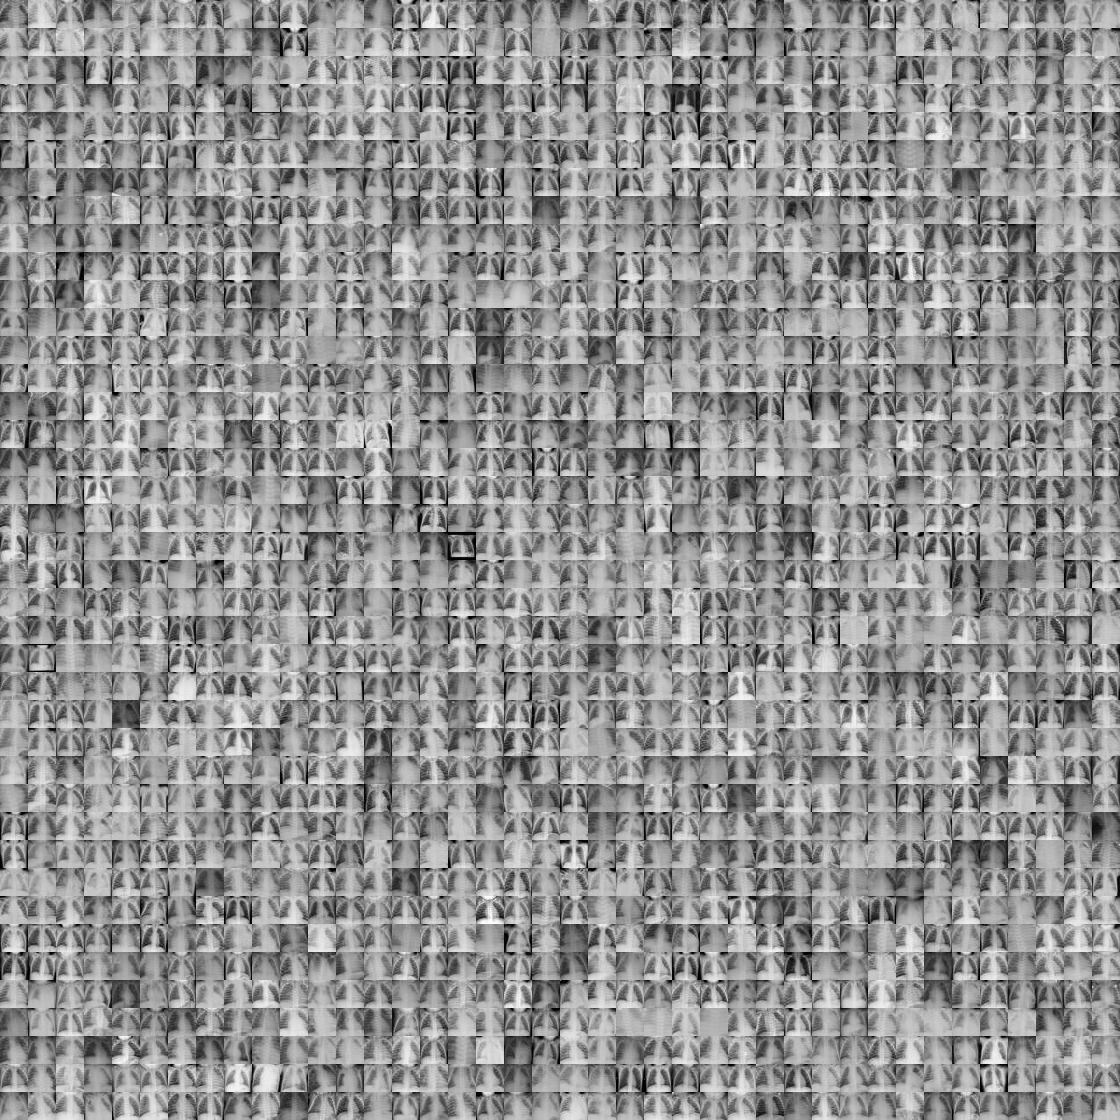

In [7]:
trainX.montage(length=40)

### Set de validacion

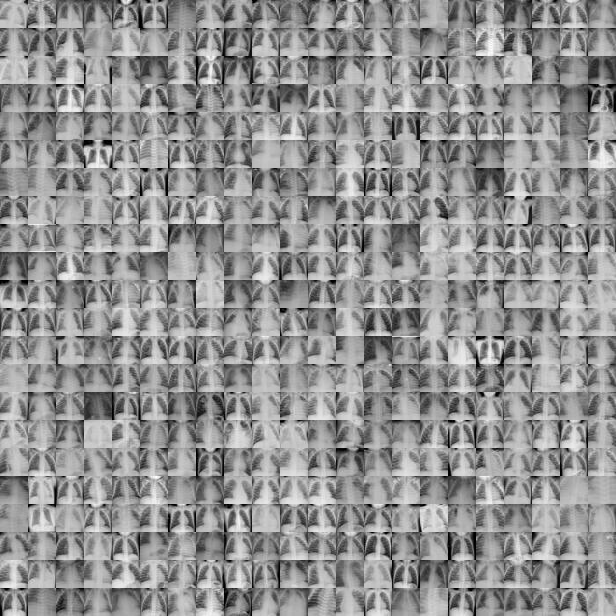

In [9]:
validX.montage(length=22)

### Set de test

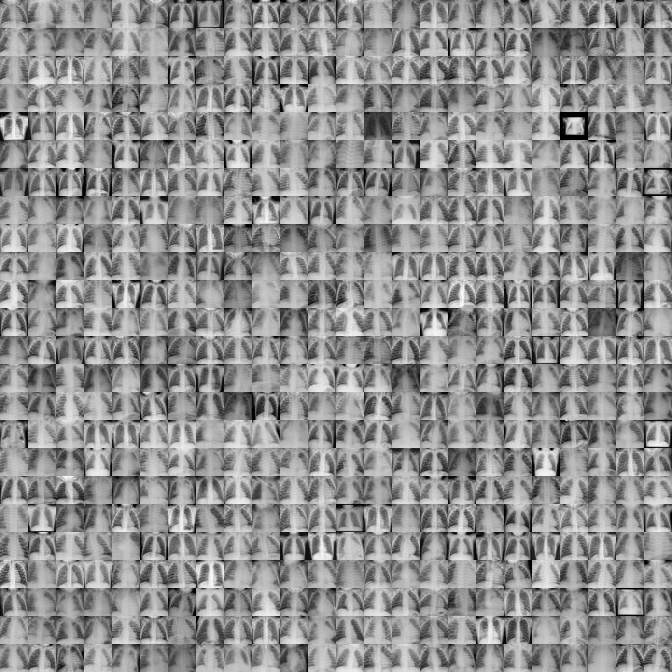

In [10]:
testX.montage(length=24)

# Preprocesamiento de datos

### Normalizamos el valor de la intensidad de la escala de gris en cada pixel

In [11]:
trainX = trainX.imgs / 255.0
validX = validX.imgs / 255.0
testX = testX.imgs / 255.0

In [12]:
(np.max(trainX),np.min(trainX))

(1.0, 0.0)

In [13]:
np.max(validX),np.min(validX)

(1.0, 0.0)

In [14]:
np.max(testX),np.min(testX)

(0.996078431372549, 0.0)

### Ahora se debe convertir los labels a formato OneHotEncoder

In [16]:
from tensorflow.keras.utils import to_categorical

trainY = to_categorical(trainY, dtype='int32');
validY = to_categorical(validY, dtype='int32');
testY = to_categorical(testY, dtype='int32');

trainY, validY, testY

(array([[[1, 0],
         [0, 1]],
 
        [[1, 0],
         [0, 1]],
 
        [[1, 0],
         [0, 1]],
 
        ...,
 
        [[1, 0],
         [0, 1]],
 
        [[0, 1],
         [1, 0]],
 
        [[1, 0],
         [0, 1]]]),
 array([[[1, 0],
         [0, 1]],
 
        [[1, 0],
         [0, 1]],
 
        [[1, 0],
         [0, 1]],
 
        ...,
 
        [[1, 0],
         [0, 1]],
 
        [[0, 1],
         [1, 0]],
 
        [[1, 0],
         [0, 1]]]),
 array([[[1, 0],
         [0, 1]],
 
        [[0, 1],
         [1, 0]],
 
        [[1, 0],
         [0, 1]],
 
        ...,
 
        [[0, 1],
         [1, 0]],
 
        [[0, 1],
         [1, 0]],
 
        [[0, 1],
         [1, 0]]]))